# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 500)

# Import dataset

In [6]:
ppi_data = pd.read_excel(r'/Projects/Mortgage Insurance Cross-sell/Dataset.xls')

ppi_data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


# Misc. checks

In [25]:
ppi_data.shape

(16383, 59)

In [26]:
ppi_data.describe()
ppi_data.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

# Distribution of target- PPI holders

In [8]:
ppi_holders=ppi_data[ppi_data['PPI']==1]

ppi_data["PPI"].value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PPI', ylabel='Count'>

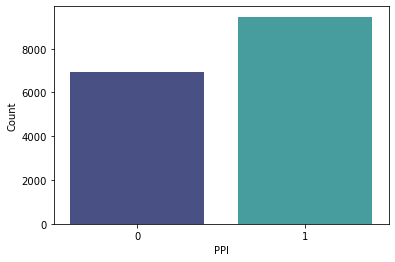

In [11]:
response = ppi_data.loc[:,"PPI"].value_counts().rename('Count')
plt.xlabel("PPI")
plt.ylabel('Count')
sns.barplot(response.index , response.values,palette="mako")

# Distribution of independent variables with target

<AxesSubplot:xlabel='PPI', ylabel='count'>

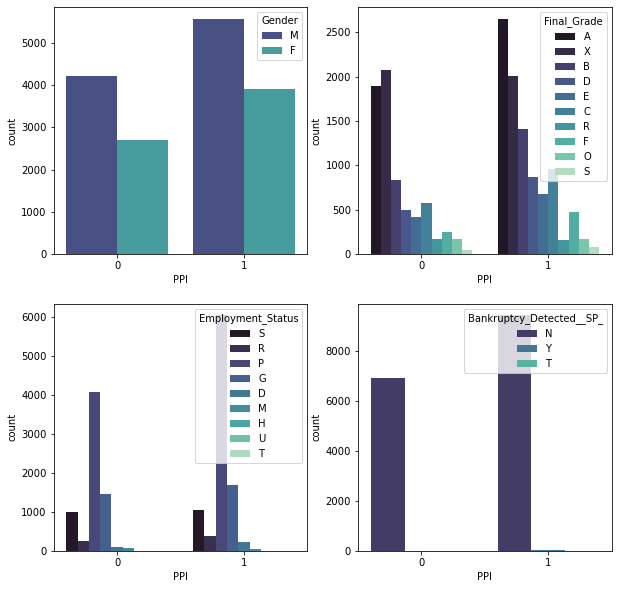

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='PPI',hue='Gender',data=ppi_data,palette="mako") 
sns.countplot(ax=axes[0,1],x='PPI',hue='Final_Grade',data=ppi_data,palette="mako") 
sns.countplot(ax=axes[1,0],x='PPI',hue='Employment_Status',data=ppi_data,palette="mako") 
sns.countplot(ax=axes[1,1],x='PPI',hue='Bankruptcy_Detected__SP_',data=ppi_data,palette="mako")

#### ~75% of PPI holders have taken unsecured product

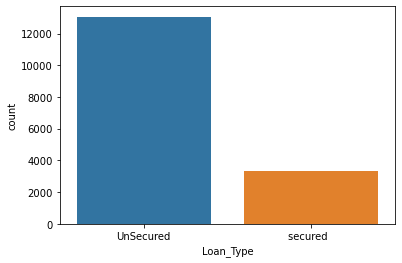

In [13]:
sns.countplot(x='Loan_Type', data=ppi_data)
plt.show()

# Plotting histogram for Credit_Score

#### Distribution is left skewed, centered at around 800-900, with most ppi holding customers with credit score 900, with apparent outliers. Customers with good credit history are given PPI

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


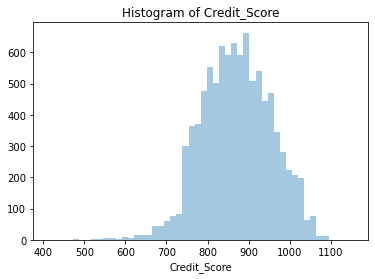

In [14]:
sns.distplot(ppi_holders["Credit_Score"], kde = False).set_title("Histogram of Credit_Score")
plt.show()

# Distribution of non-PPI holders

In [15]:
non_ppi_holders=ppi_data[ppi_data['PPI']==0]

#### ppi_holders-Most of the customers are falling in 30-50 age group. Non-ppi holders- Most of the customers are falling in 30-50 age group.

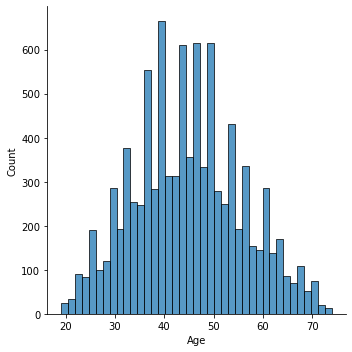

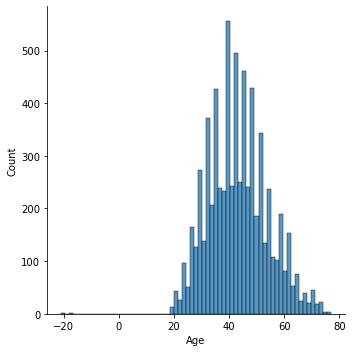

In [16]:
sns.displot(ppi_holders['Age'])
sns.displot(non_ppi_holders['Age'])

# Plotting histogram for Time_in_Employment

#### Distribution is right skewed, most ppi holding customers with time in employment 50 months, with apparent outliers.Customers with initial employment duration have PPI. 

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


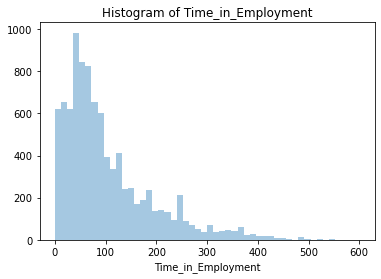

In [17]:
sns.distplot(ppi_holders["Time_in_Employment"], kde = False).set_title("Histogram of Time_in_Employment")
plt.show()

# Plotting histogram of Income_Range

#### Distribution is left skewed, majority ppi holding customers have income range >2. Customers with income range 6 have the purchase capability for PPL. Customers with initial employment duration have PPI. 

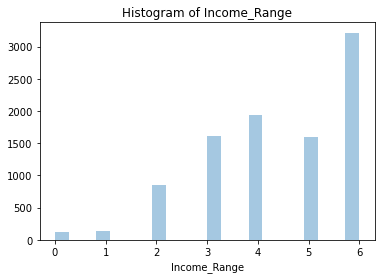

In [19]:
sns.distplot(ppi_holders["Income_Range"], kde = False).set_title("Histogram of Income_Range")
plt.show()

# Relation between age and time_in_employment

#### With age increasing, time in employment incraeses. Certain population fall in retirement bucket with age on higher side and no time in employment.

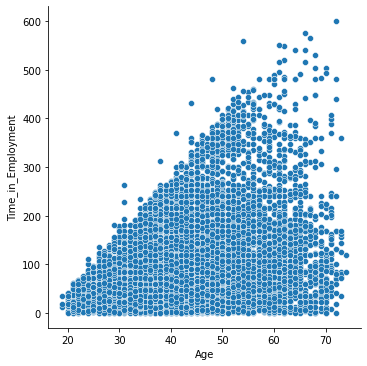

In [21]:
sns.relplot(x='Age', y='Time_in_Employment', data=ppi_holders, kind='scatter')
plt.show()

# Relation between Outstanding_Mortgage_Bal and Total_Outstanding_Balances

#### Outstanding_Mortgage_Bal and Total_Outstanding_Balances have a linear relation and have a positive correlation.

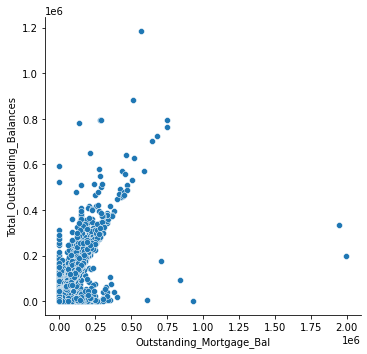

In [22]:
sns.relplot(x='Outstanding_Mortgage_Bal', y='Total_Outstanding_Balances', data=ppi_holders, kind='scatter')
plt.show()

# Plotting age by product type

Text(0.5, 1.0, 'Boxplot of Age by product type')

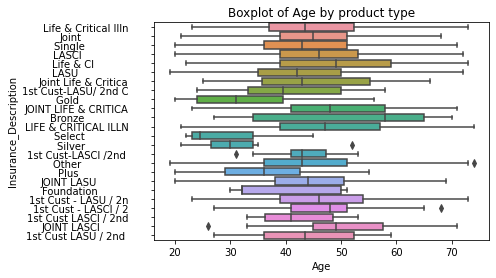

In [24]:
sns.boxplot(x = ppi_holders["Age"], y = ppi_holders["Insurance_Description"]).set_title("Boxplot of Age by product type")